In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from pykrx import stock
import pandas as pd

단순이동평균(Simple moving average) = 정해진 기간 만큼의 과거 데이터를 포함한 평균

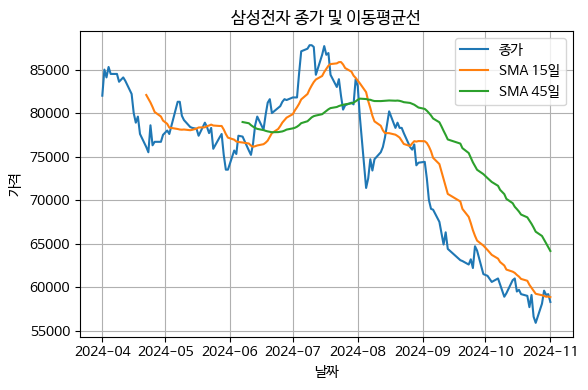

In [65]:
# 주가 데이터 다운로드(삼성전자) - pykrx 이용
ticker = '005930'
start_date = '2024-04-01'
end_date = '2024-11-01'
df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)

# 단순이동평균 계산
df['SMA_15'] = df['종가'].rolling(window=15).mean()
df['SMA_45'] = df['종가'].rolling(window=45).mean()

# 시각화
plt.figure(figsize=(6,4))
plt.plot(df.index, df['종가'], label='종가')
plt.plot(df.index, df['SMA_15'], label='SMA 15일')
plt.plot(df.index, df['SMA_45'], label='SMA 45일')
plt.title("삼성전자 종가 및 이동평균선")
plt.xlabel("날짜")
plt.ylabel("가격")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed


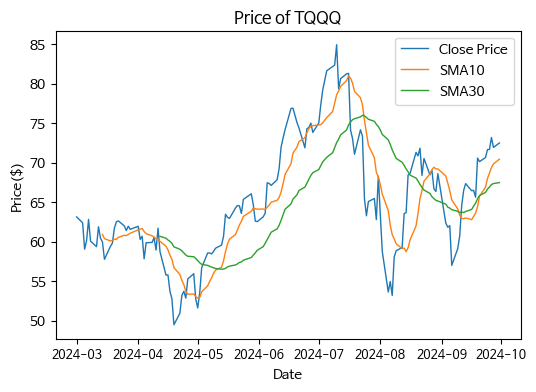

In [4]:
# 주가 데이터 다운로드(TQQQ) - yfinance 이용
ticker = 'TQQQ'
start_date = '2024-03-01'
end_date = '2024-10-01'
tqqq = yf.download(ticker, start_date, end_date, multi_level_index=False, auto_adjust=False)

# 단순이동평균 계산
tqqq['sma10'] = tqqq['Close'].rolling(window=10, min_periods=10).mean()
tqqq['sma30'] = tqqq['Close'].rolling(window=30, min_periods=30).mean()

# 시각화
plt.figure(figsize=(6,4))

plt.plot(tqqq.Close, label='Close Price', linewidth=1)
plt.plot(tqqq.sma10, label='SMA10', linewidth=1)
plt.plot(tqqq.sma30, label='SMA30', linewidth=1)

plt.title('Price of TQQQ')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.tick_params(axis='x', labelsize=9)
plt.legend()
# plt.savefig('plt_09.png', dpi=300)
plt.show()


지수가중이동평균(Exponential Weighted Moving Average)

- 기존 단순이동평균은 window size가 커질수록 가격 변화가 지연된다는 문제 발생
- 해결책: 최근 데이터에 더 큰 가중치를 주는 지수가중이동평균 사용

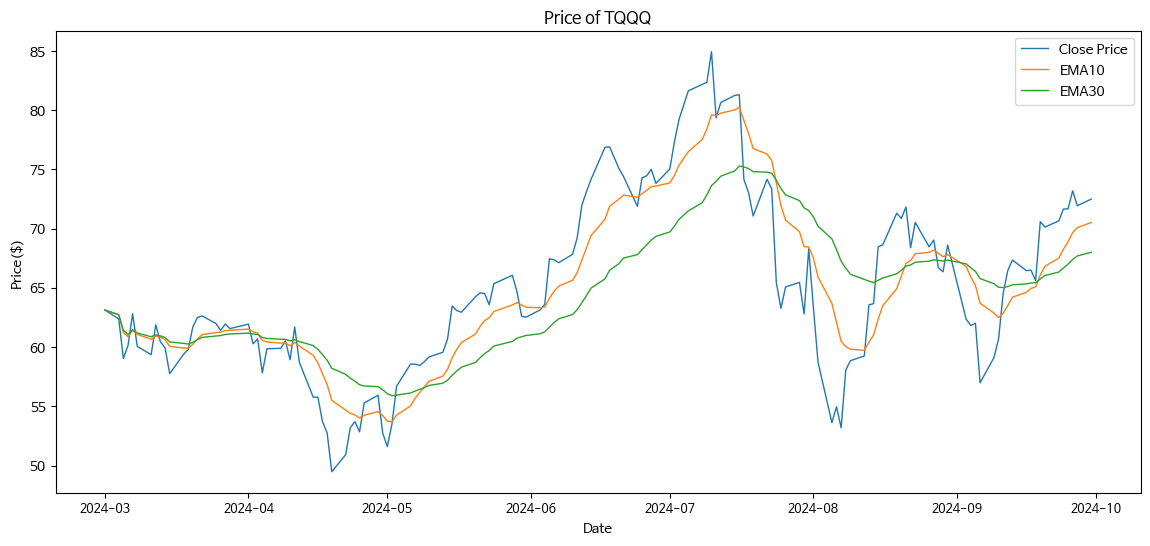

In [6]:
# TQQQ 지수가중이동평균선 구하기

# 지수가중이동평균 계산
tqqq['ema10'] = tqqq['Close'].ewm.(span=10, adjust=True).mean()
tqqq['ema30'] = tqqq['Close'].ewm(span=30, adjust=True).mean()

# 시각화
plt.figure(figsize=(14,6))

plt.plot(tqqq.Close, label='Close Price', linewidth=1)
plt.plot(tqqq.ema10, label='EMA10', linewidth=1)
plt.plot(tqqq.ema30, label='EMA30', linewidth=1)

plt.title('Price of TQQQ')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.tick_params(axis='x', labelsize=9)
plt.legend()
# plt.savefig('plt_10.png', dpi=300)
plt.show()

상대강도지수(Relative Strength index, RSI)
- 과매수, 과매도 상태를 판단하는데 사용되는 기술적 지표
- 통상적으로, RSI>70이면 과매수 상태, RSI<30 이면 과매도 상태로 판단

[*********************100%***********************]  1 of 1 completed


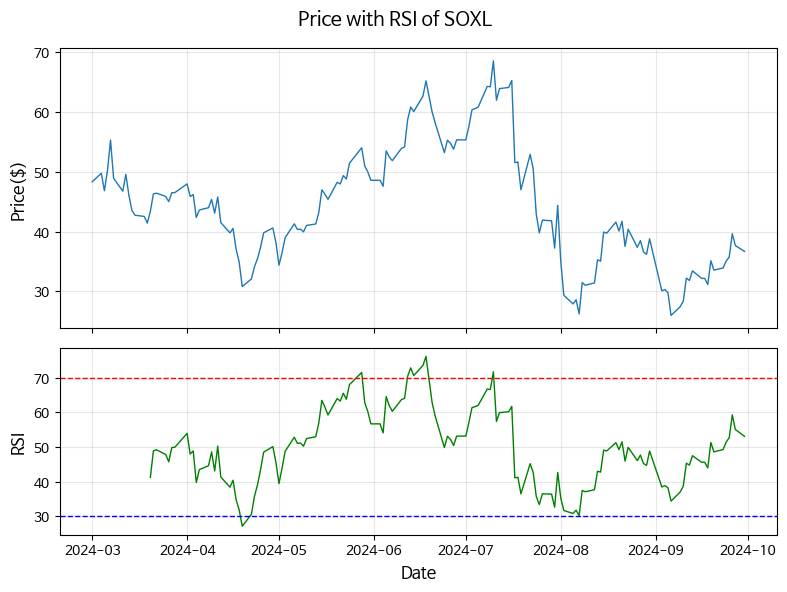

In [67]:
# RSI 계산

import ta

# 주가 데이터 다운로드
ticker = 'SOXL'
start_date = '2024-03-01'
end_date = '2024-10-01'
soxl = yf.download(ticker, start_date, end_date, multi_level_index=False, auto_adjust=False)

# RSI 계산
period = 14
soxl['RSI'] = ta.momentum.rsi(soxl.Close, window=period)
#  "14일 동안의 주가 상승폭과 하락폭"을 기반으로 RSI를 계산한다는 뜻
# 보통 14일 사용

# 시각화
fig, ax = plt.subplots(2, 1, sharex=True, height_ratios=(3,2), figsize=(8,6))
ax[0].plot(soxl.Close, linewidth=1)
ax[0].grid(alpha=0.3)
ax[0].set_ylabel('Price($)', fontsize=12)

ax[1].plot(soxl.RSI, color='green', linewidth=1)
ax[1].axhline(y=30, color='blue', linewidth=1, linestyle='--')
ax[1].axhline(y=70, color='red', linewidth=1, linestyle='--')
ax[1].grid(alpha=0.3)
ax[1].set_xlabel('Date', fontsize=12)
ax[1].set_ylabel('RSI', fontsize=12)

fig.suptitle('Price with RSI of SOXL', fontsize=14)
plt.tight_layout()
# plt.savefig('plt_11.png', dpi=300)
plt.show()

볼린저 밴드
- 주가가 평균에서 얼마나 벗이나는지를 통해 과매수/과매도 상태 판단
- 평균 회귀 전략에서 주로 사용

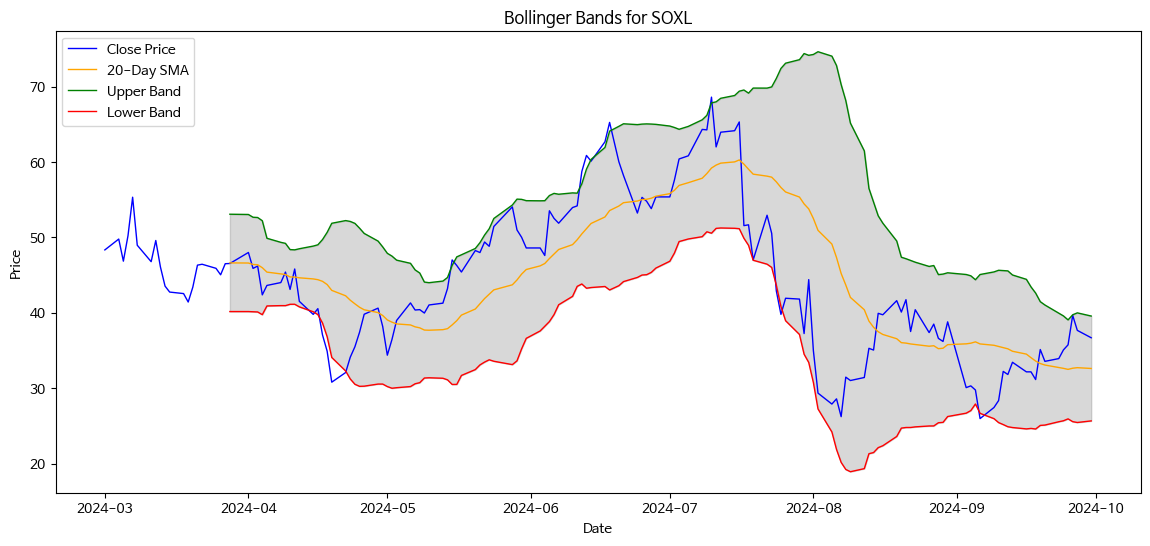

In [10]:
# 중심선과 표준편차 계산
soxl['SMA20'] = soxl['Close'].rolling(window=20).mean()
soxl['STD20'] = soxl['Close'].rolling(window=20).std()

# 상하단선 계산
soxl['Upper Band'] = soxl['SMA20'] + 2*soxl['STD20']
soxl['Lower Band'] = soxl['SMA20'] - 2*soxl['STD20']

# 시각화
plt.figure(figsize=(14,6))
plt.plot(soxl['Close'], label='Close Price', color='blue', linewidth=1)
plt.plot(soxl['SMA20'], label='20-Day SMA', color='orange', linewidth=1)
plt.plot(soxl['Upper Band'], label='Upper Band', color='green', linewidth=1)
plt.plot(soxl['Lower Band'], label='Lower Band', color='red', linewidth=1)

plt.fill_between(soxl.index, soxl['Upper Band'], soxl['Lower Band'], color='gray', alpha=0.3)

plt.title(f"Bollinger Bands for SOXL")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.savefig('plt_12.png', dpi=300)
plt.show()

## 📈 **추세 추종 전략 (Trend Following Strategy)**

> 💡 **"가격이 움직이는 방향(추세)을 따라가면 수익을 낼 수 있다"**  
> 단순하지만 강력한 투자 아이디어입니다.

---

### ✅ **전략의 핵심 아이디어**

- 📊 시장에는 **추세(trend)**가 존재한다고 가정  
- 🚀 **추세에 편승**하면 지속적인 수익을 낼 수 있음  

> ⚠️ 하지만 문제는…  
> **인간이 추세를 정확히 예측하는 것은 거의 불가능!**

---

### 🧠 **해결책: 이동 평균선 교차 전략 (MAC - Moving Average Crossover)**

- 이동 평균선의 단기(short window)와 장기(long window) 기간 결정
- 골든 크로스 발생 -> 가용 현금 전액 사용하여 매수
- 데스 크로스 발생 -> 보유 주식 전량 매도

1. **백테스팅**
   - (1) Event-Driven Backtesting
     - for loop 사용해서 처음부터 끝까지 마치 녹화된 영상을 재생하듯이 하루하루 조건을 체크하며 거래 여부 결정
     - 장점: 직관적이고 정교한 전략까지도 정확하게 테스트
     - 단점: 속도 느림
       
   - (2) Vectorized Backtesting
     - 미리 조건에 맞는 사고 파는 포인터를 찾아 계산에 필요한 데이터를 모두 벡터화해서 넘파이와 판다스의 벡터 연산 기능을 이용해 빠르게 결과를 도출하는 방식
     - 장점: 속도 월등히 빠름
     - 단점: 오류 위험 존재, 정교한 전략 구현 어려움  

Event-Driven Backtesting

In [14]:
# 애플 주식 데이터 다운로드
ticker = 'AAPL'
start_date = '2022-08-01'
end_date = '2024-08-01'
df = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [15]:
import numpy as np

short_window = 10 # 단기
long_window = 20 # 장기

# 지수가중 이동평균선 계산
data = df.copy()
data['Short_MA'] = data['Close'].ewm(span=short_window, adjust=False).mean()
data['Long_MA'] = data['Close'].ewm(span=long_window, adjust=False).mean()
data = data[long_window:].copy() # 초기 데이터 제거

# 포지션과 시그널 계산
data['Position'] = np.where(data['Short_MA'] > data['Long_MA'], 1, 0)
data['Signal'] = data['Position'].diff().fillna(0) # 1: 매수, -1: 매도

cash_init = 10000 # 초기 현금
cash = cash_init
asset = np.zeros(len(data)) # 보유 자산 가치 기록 배열
asset[0] = cash
pos = 0 # 1: 포지션(1:매수->주식 보유, 0:현금 보유)

prices = data['Close'].values # 종가 넘파이 배열
signals = data['Signal'].values # 시그널 넘파이 배열

for i in range(1, len(data)):
    if pos == 0:
        if signals[i] == 1: # 골든 크로스
            pos = 1 # 포지션 갱신
            entry_price = prices[i] # 매수 가격
            num = int(cash/entry_price) # 매수 수량
            cash -= entry_price*num # 주식 매수 대금 지급에 따른 현금 갱신
    elif pos == 1:                
        if signals[i] == -1: # 데스 크로스
            pos = 0 # 포지션 갱신
            cash += prices[i]*num # 주식 매도 대금 유입에 따른 현금 갱신

    # 자산 가치 갱신, 기록
    if pos == 0:
        asset[i] = cash
    elif pos == 1:
        asset[i] = cash + prices[i]*num     

# 시각화를 위한 매수, 매도 시점과 가격 컬럼 계산
data['Buy_Price'] = np.where(data['Signal'] == 1, data['Close'], np.nan)
data['Sell_Price'] = np.where(data['Signal'] == -1, data['Close'], np.nan)

# 누적 수익률 계산, 출력
data['Cumulative_Return'] = np.array(asset)/cash_init
final_cum_return = data['Cumulative_Return'].iloc[-1] - 1
print(f'Final cumulative return of the strategy: {100*final_cum_return:.2f}%')    

Final cumulative return of the strategy: 29.38%


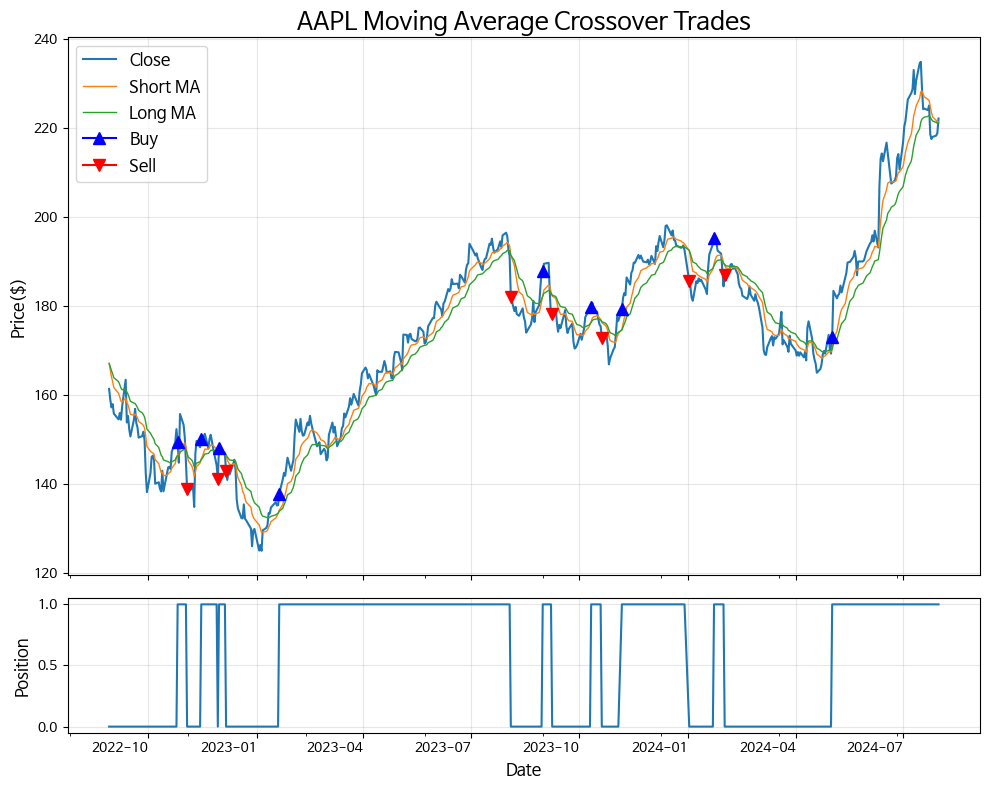

In [16]:
# 이동평균선 교차 전략에 따른 매매와 포지션 시각화
fig, ax = plt.subplots(2, 1, sharex=True, height_ratios=(8,2), figsize=(10,8))

data['Close'].plot(ax=ax[0], label='Close')
data['Short_MA'].plot(ax=ax[0], label='Short MA', linewidth=1)
data['Long_MA'].plot(ax=ax[0], label='Long MA', linewidth=1)
data['Buy_Price'].plot(ax=ax[0], label='Buy', marker='^', color='b', markersize=8)
data['Sell_Price'].plot(ax=ax[0], label='Sell', marker='v', color='r', markersize=8)

ax[0].set_title(f'{ticker} Moving Average Crossover Trades', fontsize=18)
ax[0].set_ylabel('Price($)', fontsize=12)
ax[0].legend(fontsize=12)
ax[0].grid(alpha=0.3)

data['Position'].plot(ax=ax[1])
ax[1].set_xlabel('Date', fontsize=12)
ax[1].set_ylabel('Position', fontsize=12)
ax[1].grid(alpha=0.3)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Vectorized Backtesting

In [18]:
short_window = 10
long_window = 20
data = df.copy()
data['Short_MA'] = data['Close'].ewm(span=short_window, adjust=False).mean()
data['Long_MA'] = data['Close'].ewm(span=long_window, adjust=False).mean()
data = data[long_window:].copy()

positions = pd.Series(np.where(data['Short_MA'] > data['Long_MA'], 1, 0), \
                      index=data.index)
signals = positions.diff().fillna(0)

data['Position'] = np.nan
data.loc[signals == 1, 'Position'] = 1
data.loc[signals == -1, 'Position'] = 0
data['Position'] = data['Position'].ffill()
data['Position'] = data['Position'].replace(np.nan, 0)

data['Signal'] = data['Position'].diff().fillna(0)

data['Buy_Price'] = np.where(data['Signal'] == 1, data['Close'], np.nan)
data['Sell_Price'] = np.where(data['Signal'] == -1, data['Close'], np.nan)   

data['Daily_Return'] = np.where(data['Position'].shift()==1, \
                                data['Close'].pct_change(), 0)
data['Cumulative_Return'] = (1+data['Daily_Return']).cumprod()    

final_cum_return = data['Cumulative_Return'].iloc[-1] - 1
print(f'Final cumulative return of the strategy: {100*final_cum_return:.2f}%')

Final cumulative return of the strategy: 29.40%


파라미터 최적화
- 위 까지의 코드에서는 short_window와 long_window 모두 정해져있지만
- 함수를 이용해 파라미터 최적화 진행

In [20]:
def mac_strategy1(df, sw, lw):
    short_window = sw
    long_window = lw
    data = df.copy()
    data['Short_MA'] = data['Close'].ewm(span=short_window, \
                                         adjust=False).mean()
    data['Long_MA'] = data['Close'].ewm(span=long_window, \
                                        adjust=False).mean()
    data = data[long_window:].copy()
    
    positions = pd.Series(np.where(data['Short_MA'] > data['Long_MA'], 1, 0), \
                          index=data.index)
    signals = positions.diff().fillna(0)
    
    data['Position'] = np.nan
    data.loc[signals == 1, 'Position'] = 1
    data.loc[signals == -1, 'Position'] = 0
    data['Position'] = data['Position'].ffill()
    data['Position'] = data['Position'].replace(np.nan, 0)
    
    data['Signal'] = data['Position'].diff().fillna(0)
    
    data['Buy_Price'] = np.where(data['Signal'] == 1, data['Close'], np.nan)
    data['Sell_Price'] = np.where(data['Signal'] == -1, data['Close'], np.nan)   
    
    data['Daily_Return'] = np.where(data['Position'].shift()==1, \
                                    data['Close'].pct_change(), 0)
    data['Cumulative_Return'] = (1+data['Daily_Return']).cumprod()    
    
    final_cum_return = data['Cumulative_Return'].iloc[-1] - 1
    print(f'Final cumulative return of the strategy: '
    f'{100*final_cum_return:.2f}%')    

    return data, final_cum_return

In [21]:
#파라미터 최적화

def parameter_optimizer1b(input_df): 
    short_window = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, \
                    18, 19, 20, 21]
    long_window =[22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, \
                  35, 36, 37, 38, 39, 40, 41, 42]
    ret_list = []  

    for x1, x2, in [(a,b) for a in short_window for b in long_window]:
        df = input_df.copy()
        _, ret = mac_strategy1(df, x1, x2)
        ret_list.append((x1, x2, ret))

    max_ror = max(ret_list, key=lambda x:x[2])[2]
    max_tups = [tup for tup in ret_list if tup[2] == max_ror]
    params1 = [tup[0] for tup in max_tups]
    params2 = [tup[1] for tup in max_tups]
    opt_param1 = int(np.median(params1))
    opt_param2 = int(np.median(params2))
    
    optimal_df = pd.DataFrame(ret_list, \
                              columns=['short_window','long_window','ror'])
    print(f'Max Tuples:{max_tups}')
    print(f'Optimal Parameters:{opt_param1, opt_param2}, '
    f'Optimized Return:{100*max_ror:.2f}%')

    return (opt_param1, opt_param2), optimal_df

In [81]:
ticker = 'NVDA'
# start_date = '2019-01-01'
start_date = '2024-01-01'
# end_date = '2024-01-01'
end_date = '2024-08-01'

df = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False, auto_adjust=False)

[*********************100%***********************]  1 of 1 completed


In [83]:
optimal_params, optimal_df = parameter_optimizer1b(df)

Final cumulative return of the strategy: 21.21%
Final cumulative return of the strategy: 26.44%
Final cumulative return of the strategy: 21.56%
Final cumulative return of the strategy: 31.07%
Final cumulative return of the strategy: 27.65%
Final cumulative return of the strategy: 32.07%
Final cumulative return of the strategy: 30.04%
Final cumulative return of the strategy: 30.04%
Final cumulative return of the strategy: 20.26%
Final cumulative return of the strategy: 20.26%
Final cumulative return of the strategy: 25.98%
Final cumulative return of the strategy: 30.19%
Final cumulative return of the strategy: 30.19%
Final cumulative return of the strategy: 30.19%
Final cumulative return of the strategy: 30.19%
Final cumulative return of the strategy: 30.19%
Final cumulative return of the strategy: 30.19%
Final cumulative return of the strategy: 30.19%
Final cumulative return of the strategy: 27.98%
Final cumulative return of the strategy: 27.98%
Final cumulative return of the strategy:

In [24]:
optimal_params


(19, 40)

In [25]:
optimal_df[optimal_df.ror>0.485]

,short_window,long_window,ror
272,17,42,0.486607
290,18,39,0.486607
291,18,40,0.486607
292,18,41,0.486607
293,18,42,0.486480
310,19,38,0.486607
311,19,39,0.486607
312,19,40,0.486480
313,19,41,0.500442
330,20,37,0.486607


### 📊 전략의 성과 지표 (Performance Metrics)

전략이 실제로 **얼마나 효과적인가**를 판단하려면, 다음 3가지 핵심 지표를 확인해야 합니다:

---

#### 1️⃣ 📈 **연평균 성장률 (CAGR: Compound Annual Growth Rate)**

> 🔹 **정의**: 전략이 매년 몇 %씩 복리로 성장했는지를 나타냅니다.  
> 🔹 **의미**: 수익률이 **꾸준히 증가했는지** 확인할 수 있음.


---

#### 2️⃣ ⚖️ **샤프 지수 (Sharpe Ratio)**

> 🔹 **정의**: 리스크(변동성)를 고려한 수익률을 측정합니다.  
> 🔹 **의미**: 높은 수익률이 **얼마나 안정적으로 발생했는지** 보여줌.
> 
> 💡 보통 **1 이상이면 양호**, **2 이상이면 우수**로 평가합니다.

---

#### 3️⃣ 📉 **최대 손실률 (MDD: Maximum Drawdown)**

> 🔹 **정의**: 전략의 수익 곡선이 **가장 크게 떨어진 비율**  
> 🔹 **의미**: 투자자가 **최악의 경우 얼마나 손실을 볼 수 있는지** 알려줍니다.
> 
> ⚠️ MDD가 낮을수록 리스크가 **낮은 전략**입니다.

In [89]:
def tear_sheet(data):
    # 거래 수수료율 Transaction Fee Rate
    fee_rate = 0.001
    
    # 투자기간 Trading Period in Years
    trading_period = len(data)/252 # in year
    print(f'Trading Period:{trading_period:.1f} years')    
    
    # 수익률 Rate of Return
    buy_and_hold = data['Close'].iloc[-1]*(1-fee_rate)\
    /(data['Close'].iloc[0]*(1+fee_rate)) - 1
    final_cum_return = data['Cumulative_Return'].iloc[-1] - 1
    print(f'Final cumulative return of the strategy:'
    f'{100*final_cum_return:.2f}%, Buy&Hold:{100*buy_and_hold:.2f}%')
    
    # 연평균 성장률 CAGR
    CAGR_strategy = (data['Cumulative_Return'].iloc[-1])**(1/trading_period)-1
    CAGR_benchmark = (buy_and_hold+1)**(1/trading_period)-1
    print(f'Strategy CAGR:{100*CAGR_strategy:.2f}%, '
           f'Benchmark CAGR:{100*CAGR_benchmark:.2f}%')
    
    # 샤프 지수 Sharpe Ratio
    risk_free_rate = 0.003
    strategy_daily_return = data['Cumulative_Return'].pct_change().fillna(0)
    mean_return = strategy_daily_return.mean()*252
    std_return = strategy_daily_return.std()*np.sqrt(252)
    sharpe_ratio = (mean_return - risk_free_rate) / std_return
    print(f'Sharpe Ratio: {sharpe_ratio:.2f}')
    
    # 최대 낙폭 Maximum Drawdown
    data['Cumulative_Max'] = data['Cumulative_Return'].cummax()
    data['Drawdown'] = data['Cumulative_Return'] / data['Cumulative_Max'] - 1
    max_drawdown = data['Drawdown'].min()
    cumulative_returns = (1 + data['Close'].pct_change()).cumprod()
    running_max = cumulative_returns.cummax()
    drawdown = cumulative_returns/running_max - 1
    mdd_benchmark = drawdown.min() 
    print(f'Strategy MDD: {100*max_drawdown:.2f}%, '
          f'Benchmark MDD: {100*mdd_benchmark:.2f}%')   

    # 승률 Win Rate
    buy_signals = data[data['Signal'] == 1].index
    sell_signals = data[data['Signal'] == -1].index
    returns = []
    holding_periods = []
    for buy_date in buy_signals:
        sell_dates = sell_signals[sell_signals > buy_date]
        if not sell_dates.empty:
            sell_date = sell_dates[0]
            buy_price = data.loc[buy_date, 'Close']
            sell_price = data.loc[sell_date, 'Close']
            return_pct = sell_price*(1-fee_rate)/(buy_price*(1+fee_rate)) - 1
            returns.append(return_pct)          
            holding_period = np.busday_count(buy_date.date(), sell_date.date())
            holding_periods.append(holding_period)
    profitable_trades = len([r for r in returns if r > 0])
    loss_trades = len([r for r in returns if r <= 0])
    total_trades = len(returns)
    win_rate = profitable_trades / total_trades if total_trades > 0 else 0
    print(f'Number of Profitable Trades:{profitable_trades}, '
    f'Number of Loss Trades:{loss_trades}, Win Rate:{100*win_rate:.2f}%')
    
    # 평균 보유 기간 Average Holding Period
    if holding_periods:
        average_holding_period = np.mean(holding_periods)
    else:
        average_holding_period = 0
    print(f'Average Holding Period:{average_holding_period:.1f}days')

    # 평균 이익과 손실 Average Profit and Loss
    if profitable_trades > 0:
        average_profit = np.mean([r for r in returns if r > 0])
    else:
        average_profit = 0
    
    if loss_trades > 0:
        average_loss = np.mean([r for r in returns if r <= 0])
    else:
        average_loss = 0
    print(f'Avg ROR/trade in profitable trades:{average_profit:.3f}%, '
          f'Avg ROR/trade in loss trades:{average_loss:.3f}%')
    
    # 손익비 Profit/Loss Ratio
    if average_loss != 0:
        profit_loss_ratio = average_profit / abs(average_loss)
    else:
        profit_loss_ratio = np.inf
    
    print(f'Profit/Loss Ratio: {profit_loss_ratio:.2f}')

In [91]:
data, ret = mac_strategy1(df, optimal_params[0], optimal_params[1])

Final cumulative return of the strategy: 39.14%


In [93]:
tear_sheet(data)

Trading Period:0.5 years
Final cumulative return of the strategy:39.14%, Buy&Hold:76.52%
Strategy CAGR:95.67%, Benchmark CAGR:217.36%
Sharpe Ratio: 2.13
Strategy MDD: -13.02%, Benchmark MDD: -23.49%
Number of Profitable Trades:1, Number of Loss Trades:0, Win Rate:100.00%
Average Holding Period:56.0days
Avg ROR/trade in profitable trades:0.389%, Avg ROR/trade in loss trades:0.000%
Profit/Loss Ratio: inf


In [168]:
#손절(Trailing stop) 수수로 모두 적용

def mac_strategy_ED(df, sw, lw, sl, verbose=True):
    fee_rate = 0.001
    
    stop_loss = sl
    stop_loss_price = 0
    
    
    short_window = sw
    long_window = lw
    data = df.copy()
    # 확실하게 1D array로 만듦
    data['Close'] = np.squeeze(data['Close'].values)
    data['Short_MA'] = data['Close'].ewm(span=short_window, \
                                         adjust=False).mean()
    data['Long_MA'] = data['Close'].ewm(span=long_window, \
                                        adjust=False).mean()
    data = data[long_window:].copy()


    positions = pd.Series(np.where(data['Short_MA'] > data['Long_MA'], 1, 0), \
                          index=data.index)
    signals = positions.diff().fillna(0) # 1: 골든 크로스, -1: 데스 크로스    
    
    cash_init = 10000
    cash = cash_init
    asset = np.zeros(len(data))
    asset[0] = cash
    pos = 0 # 1: 포지션(1:매수->주식 보유, 0:현금 보유)
    
    prices = data['Close'].values
    signals = signals.values
    pos_vec = np.zeros(len(data))
    
    for i in range(1, len(data)):
        if pos == 0:
            if signals[i] == 1: # 골든 크로스 발생
                pos_vec[i] = 1
                pos = 1
                entry_price = prices[i]
                num = int(cash/(entry_price*(1+fee_rate)))
                cash -= entry_price*num*(1+fee_rate)
                stop_loss_price = entry_price*(1 - stop_loss) # 손절가
        elif pos == 1:
            if prices[i] < stop_loss_price: # 손절 발생
                pos = 0
                cash += prices[i]*num*(1-fee_rate)
                # cash += stop_loss_price*num                
            elif signals[i] == -1: # 데드 크로스 발생
                pos = 0
                cash += prices[i]*num*(1-fee_rate)
            else: # 포지션 유지 -> 손절가 갱신
                pos_vec[i] = 1
                stop_loss_price = max(stop_loss_price, \
                                      prices[i]*(1 - stop_loss))
    
        if pos == 0:
            asset[i] = cash
        elif pos == 1:
            asset[i] = cash + prices[i]*num  

    data['Position'] = pos_vec
    data['Signal'] = data['Position'].diff().fillna(0)
    # 오류 발생 구간 수정
    close_vals = data['Close'].to_numpy().reshape(-1)
    signal_vals = data['Signal'].to_numpy().reshape(-1)

    data['Buy_Price'] = np.where(signal_vals == 1, close_vals, np.nan)
    data['Sell_Price'] = np.where(signal_vals == -1, close_vals, np.nan)


    data['Cumulative_Return'] = np.array(asset)/cash_init
    final_cum_return = data['Cumulative_Return'].iloc[-1] - 1
    if verbose:
        print(f'Final cumulative return of the strategy: '
              f'{100*final_cum_return:.2f}%')   

    return data, final_cum_return

In [121]:
import time

def parameter_optimizer2(input_df):
    short_window = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    long_window =[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, \
                  32, 33, 34, 35, 36, 37]
    stop_loss = [0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]
    ret_list = []  

    for x1, x2, x3 in [(a,b,c) for a in short_window \
                       for b in long_window for c in stop_loss]:
        df = input_df.copy()
        _, ret = mac_strategy_ED(df, x1, x2, x3, verbose=False)
        ret_list.append((x1, x2, x3, ret))
        
    max_ror = max(ret_list, key=lambda x:x[3])[3]
    max_tups = [tup for tup in ret_list if tup[3] == max_ror]
    params1 = [tup[0] for tup in max_tups]
    params2 = [tup[1] for tup in max_tups]
    params3 = [tup[2] for tup in max_tups]
    opt_param1 = int(np.median(params1))
    opt_param2 = int(np.median(params2))
    opt_param3 = np.median(params3)

    optimal_df = pd.DataFrame(ret_list, \
             columns=['short_window','long_window','stop_loss', 'ror'])

    print(f'Max Tuples:{max_tups}')
    print(f'Optimal Parameters:'
          f'{opt_param1, opt_param2, opt_param3}, '
    f'Optimized Return:{100*max_ror:.2f}%')

    return (opt_param1, opt_param2, opt_param3), optimal_df

In [123]:
###Trailing Stop만 적용한 이동평균선 교차 전략 Vectorized Backtest 함수

def mac_strategy_vector(df, sw, lw, sl, verbose=True):
    short_window = sw
    long_window = lw
    stop_loss = sl
    
    data = df.copy()
    data['Short_MA'] = data['Close'].ewm(span=short_window, \
                                         adjust=False).mean()
    data['Long_MA'] = data['Close'].ewm(span=long_window, \
                                        adjust=False).mean()
    data = data[long_window:].copy()
    
    positions = pd.Series(np.where(data['Short_MA'] > data['Long_MA'], 1, 0), \
                          index=data.index)
    signals = positions.diff().fillna(0)
    entry_points = (signals == 1).astype(int) # 골든 크로스 지점에서만 1
    exit_points = (signals == -1).astype(int) # 데스 크로스 지점에서만 1

    # 새로 만들 컬럼의 초기 NaN 세팅
    data['Position'] = np.nan
    data['HighSinceEntry'] = np.nan

    # 골든 크로스, 데스 크로스 포인트에서 값 변경
    data.loc[entry_points == 1, 'Position'] = 1
    data.loc[exit_points == 1, 'Position'] = 0

    # 진입구간마다 번호 부여
    data['TradeGroup'] = entry_points.cumsum()

    # 각각의 진입구간에서 매수가 이후 롤링 최댓값 저장
    data['HighSinceEntry'] = data.groupby('TradeGroup')['Close'].cummax()
    
    # 진입구간마다 모든 시점에서의 손절가 일괄 계산
    data['TrailingStop'] = data['HighSinceEntry'].shift(1) * (1 - stop_loss)
    
    # 손절 발생 시점 일괄 계산
    stop_loss_hit = (data['Close'] < data['TrailingStop']) \
    & (positions == 1) & (entry_points != 1)
    data.loc[stop_loss_hit, 'Position'] = 0
    data['Position'] = data['Position'].ffill()
    data['Position'] = data['Position'].replace(np.nan, 0) # 초기 NaN -> 0
    
    # NaN Forward Fill로 Position 컬럼 완성
    data['Position'] = data['Position'].ffill()
    data['Signal'] = data['Position'].diff()

    data['Buy_Price'] = np.where(data['Signal'] == 1, data['Close'], np.nan)
    data['Sell_Price'] = np.where(data['Signal'] == -1, data['Close'], np.nan)        
    data['Daily_Return'] = np.where(data['Position'].shift()==1, \
                                    data['Close'].pct_change(), 0)
    data['Cumulative_Return'] = (1+data['Daily_Return']).cumprod()
    final_cum_return = data['Cumulative_Return'].iloc[-1] - 1   

    if verbose:
        print(f'Final cumulative return of the strategy: '
              f'{100*final_cum_return:.2f}%')  

    return data, final_cum_return

In [125]:
def parameter_optimizer2_vector(input_df):
    short_window = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    long_window =[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, \
                  32, 33, 34, 35, 36, 37]
    stop_loss = [0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]
    ret_list = []  

    for x1, x2, x3 in [(a,b,c) for a in short_window \
                       for b in long_window for c in stop_loss]:
        df = input_df.copy()
        _, ret = mac_strategy_vector(df, x1, x2, x3, verbose=False)
        ret_list.append((x1, x2, x3, ret))
        
    max_ror = max(ret_list, key=lambda x:x[3])[3]
    max_tups = [tup for tup in ret_list if tup[3] == max_ror]
    params1 = [tup[0] for tup in max_tups]
    params2 = [tup[1] for tup in max_tups]
    params3 = [tup[2] for tup in max_tups]
    opt_param1 = int(np.median(params1))
    opt_param2 = int(np.median(params2))
    opt_param3 = np.median(params3)

    optimal_df = pd.DataFrame(ret_list, \
             columns=['short_window','long_window','stop_loss', 'ror'])

    print(f'Max Tuples:{max_tups}')
    print(f'Optimal Parameters:'
          f'{opt_param1, opt_param2, opt_param3}, '
    f'Optimized Return:{100*max_ror:.2f}%')

    return (opt_param1, opt_param2, opt_param3), optimal_df

삼성전자 데이터 이용한 추세추종 전략

In [128]:
import FinanceDataReader as fdr

df_ss = fdr.DataReader( '005930', '2023-01-01', '2024-12-31')

print(df_ss.tail())

             Open   High    Low  Close    Volume    Change
Date                                                      
2024-12-23  53400  54000  53300  53500  13672650  0.009434
2024-12-24  53700  54500  53600  54400  11634677  0.016822
2024-12-26  54500  54600  53500  53600  10517075 -0.014706
2024-12-27  53500  54100  53200  53700  10747196  0.001866
2024-12-30  53300  54000  53100  53200  12624702 -0.009311


In [36]:
optimal_params, optimal_df = parameter_optimizer1b(df_ss)

Final cumulative return of the strategy: -10.67%
Final cumulative return of the strategy: -9.51%
Final cumulative return of the strategy: -8.21%
Final cumulative return of the strategy: -11.17%
Final cumulative return of the strategy: -8.32%
Final cumulative return of the strategy: -7.04%
Final cumulative return of the strategy: -6.51%
Final cumulative return of the strategy: -6.90%
Final cumulative return of the strategy: -6.89%
Final cumulative return of the strategy: -6.06%
Final cumulative return of the strategy: -6.06%
Final cumulative return of the strategy: -6.06%
Final cumulative return of the strategy: -6.06%
Final cumulative return of the strategy: -3.74%
Final cumulative return of the strategy: -9.94%
Final cumulative return of the strategy: -10.31%
Final cumulative return of the strategy: -10.31%
Final cumulative return of the strategy: -12.83%
Final cumulative return of the strategy: -14.05%
Final cumulative return of the strategy: -14.87%
Final cumulative return of the st

In [37]:
optimal_params


(10, 23)

#trailing stop을 적용한 backtesting

In [160]:
#Event-Driven backtesting

t1 = time.time()


optimal_params, optimal_df = parameter_optimizer2(df_ss)

t2 = time.time()

data_ss, ret_ss = mac_strategy_ED(df, optimal_params[0], optimal_params[1], \
                           optimal_params[2])
tear_sheet(data_ss)

Max Tuples:[(5, 20, 0.11, np.float64(0.0)), (5, 20, 0.12, np.float64(0.0)), (5, 20, 0.13, np.float64(0.0)), (5, 20, 0.14, np.float64(0.0)), (5, 20, 0.15, np.float64(0.0)), (5, 20, 0.16, np.float64(0.0)), (5, 20, 0.17, np.float64(0.0)), (5, 20, 0.18, np.float64(0.0)), (5, 20, 0.19, np.float64(0.0)), (5, 21, 0.11, np.float64(0.0)), (5, 21, 0.12, np.float64(0.0)), (5, 21, 0.13, np.float64(0.0)), (5, 21, 0.14, np.float64(0.0)), (5, 21, 0.15, np.float64(0.0)), (5, 21, 0.16, np.float64(0.0)), (5, 21, 0.17, np.float64(0.0)), (5, 21, 0.18, np.float64(0.0)), (5, 21, 0.19, np.float64(0.0)), (5, 22, 0.11, np.float64(0.0)), (5, 22, 0.12, np.float64(0.0)), (5, 22, 0.13, np.float64(0.0)), (5, 22, 0.14, np.float64(0.0)), (5, 22, 0.15, np.float64(0.0)), (5, 22, 0.16, np.float64(0.0)), (5, 22, 0.17, np.float64(0.0)), (5, 22, 0.18, np.float64(0.0)), (5, 22, 0.19, np.float64(0.0)), (5, 23, 0.11, np.float64(0.0)), (5, 23, 0.12, np.float64(0.0)), (5, 23, 0.13, np.float64(0.0)), (5, 23, 0.14, np.float64(0.0

In [164]:
data_ss['Close'].shape

(118,)

In [166]:
print(type(data['Close']))
print(data['Close'].shape)
print(type(data['Signal']))
print(data['Signal'].shape)


<class 'pandas.core.series.Series'>
(124,)
<class 'pandas.core.series.Series'>
(124,)


In [43]:
#Vectorized Backtesting

t1 = time.time()

optimal_params, optimal_df = parameter_optimizer2_vector(df_ss)

t2 = time.time()
print(f'Elapsed Time: {(t2-t1)/60:.2f}min')

data, ret = mac_strategy_vector(df, optimal_params[0], optimal_params[1], \
                           optimal_params[2])
tear_sheet(data)

Max Tuples:[(13, 20, 0.11, np.float64(0.09988274038102651)), (13, 20, 0.12, np.float64(0.09988274038102651)), (13, 20, 0.13, np.float64(0.09988274038102651)), (13, 20, 0.14, np.float64(0.09988274038102651)), (13, 20, 0.15, np.float64(0.09988274038102651)), (13, 20, 0.16, np.float64(0.09988274038102651)), (13, 20, 0.17, np.float64(0.09988274038102651)), (13, 20, 0.18, np.float64(0.09988274038102651)), (13, 20, 0.19, np.float64(0.09988274038102651))]
Optimal Parameters:(13, 20, np.float64(0.15)), Optimized Return:9.99%
Elapsed Time: 0.37min
Final cumulative return of the strategy: 14.75%
Trading Period:1.9 years
Final cumulative return of the strategy:14.75%, Buy&Hold:37.34%
Strategy CAGR:7.44%, Benchmark CAGR:18.00%
Sharpe Ratio: 0.49
Strategy MDD: -21.58%, Benchmark MDD: -23.50%
Number of Profitable Trades:2, Number of Loss Trades:5, Win Rate:28.57%
Average Holding Period:31.0days
Avg ROR/trade in profitable trades:0.138%, Avg ROR/trade in loss trades:-0.061%
Profit/Loss Ratio: 2.28


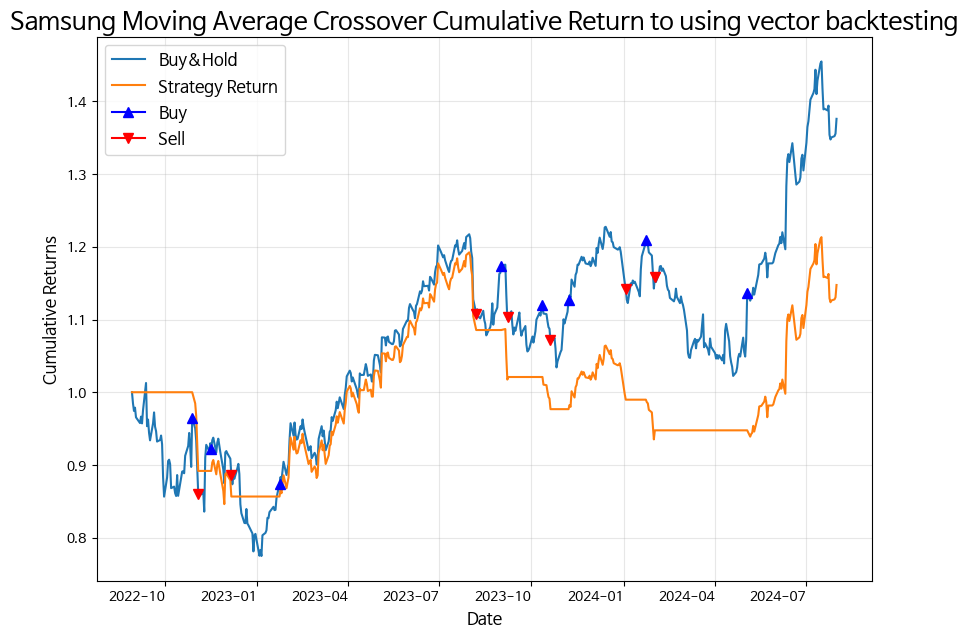

In [44]:
#전략과 벤치마크의 누적 수익률 시각화 코드

buy_and_hold = data['Close']/data['Close'].iloc[0]
buy_price = data['Buy_Price']/data['Close'].iloc[0]
sell_price = data['Sell_Price']/data['Close'].iloc[0]

fig, ax = plt.subplots(figsize=(10, 8))

buy_and_hold.plot(ax=ax, label='Buy&Hold')
data['Cumulative_Return'].plot(ax=ax, label='Strategy Return')
buy_price.plot(ax=ax, label='Buy', marker='^', color='b', markersize=7)
sell_price.plot(ax=ax, label='Sell', marker='v', color='r', markersize=7)

ax.set_title(f'Samsung Moving Average Crossover Cumulative Return to using vector backtesting', fontsize=18)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Returns', fontsize=12)
ax.legend(fontsize=12)
ax.grid(alpha=0.3)
plt.xticks(rotation=0)
plt.show()

### MAC 전략의 Rolling test 함수 ###
- 고정된 길이의 테스트 구간(window)을 설정해, 시점을 계속 이동시키며 반복적으로 백테스트하는 방법
- 장점
  1. 오버피팅 방지
  2. 사장 상화 다양성 반영
  3. "1년 훈련 → 다음 1년 운용" 등 현실적인 전략 점검 가능

In [138]:
from datetime import datetime
def rolling_test(ticker, date):
    # 데이터 다운로드
    middle_date = date
    middle_date_dt = datetime.strptime(middle_date, '%Y-%m-%d')
    start_date_dt = middle_date_dt.replace(year=middle_date_dt.year - 5)
    start_date = start_date_dt.strftime('%Y-%m-%d')   
    end_date_dt = middle_date_dt.replace(year=middle_date_dt.year + 2)
    end_date = end_date_dt.strftime('%Y-%m-%d')
    df = yf.download(ticker, start_date, end_date)

    # 파라미터 최적화와 백테스트
    df_train = df.loc[start_date:middle_date].copy()
    optimal_params, optimal_df = parameter_optimizer2(df_train)   
    df_test = df.loc[middle_date:].copy()
    data, ret = mac_strategy3(df_test, optimal_params[0], optimal_params[1], \
                               optimal_params[2])

    # 연평균 성장률 CAGR
    fee_rate = 0.001
    trading_period = len(data)/252 # in years   
    buy_and_hold = data['Close'].iloc[-1]*(1-fee_rate)\
    /(data['Close'].iloc[0]*(1+fee_rate))
    CAGR_strategy = (data['Cumulative_Return'].iloc[-1])**(1/trading_period)-1
    CAGR_benchmark = (buy_and_hold)**(1/trading_period)-1

    # 최대 낙폭 Maximum Drawdown
    data['Cumulative_Max'] = data['Cumulative_Return'].cummax()
    data['Drawdown'] = data['Cumulative_Return'] / data['Cumulative_Max'] - 1
    mdd_strategy = data['Drawdown'].min()

    cumulative_returns = (1 + data['Close'].pct_change()).cumprod()
    running_max = cumulative_returns.cummax()
    drawdown = cumulative_returns/running_max - 1
    mdd_benchmark = drawdown.min()  

    return CAGR_strategy, mdd_strategy, CAGR_benchmark, mdd_benchmark

In [ ]:
#과거 5년간 6개월 단위 rolling test

dates = ['2018-01-01','2018-07-01','2019-01-01','2019-07-01','2020-01-01',\
         '2020-07-01','2021-01-01','2021-07-01','2022-01-01','2022-07-01']
results = \
{('Strategy','CAGR'):[],('Strategy','MDD'):[],('Benchmark','CAGR'):[],\
           ('Benchmark','MDD'):[]}
ticker = 'TSLA'
for date in dates:
    CAGR_strategy, mdd_strategy, CAGR_benchmark, mdd_benchmark = \
    rolling_test(ticker, date)
    results[('Strategy','CAGR')].append(CAGR_strategy)
    results[('Strategy','MDD')].append(mdd_strategy)
    results[('Benchmark','CAGR')].append(CAGR_benchmark)
    results[('Benchmark','MDD')].append(mdd_benchmark)
    print(f'Date:{date}, CAGR_Strategy:{100*CAGR_strategy:.2f}%, '
          f'MDD_Strategy:{100*mdd_strategy:.2f}% CAGR_Benchmark:'
        f'{100*CAGR_benchmark:.2f}%, MDD_Benchmark:{100*mdd_benchmark:.2f}%')
results_df = pd.DataFrame(results, index=dates)
results_df